# Generating Simple Audio Signals

[back to main page](index.ipynb)

We create a simple sine wave as an introductory example using Python and NumPy, using a Jupyter/IPython notebook.

Let's start very simple. We create ~~three~~ four numbers and give each of them a name.

> Sometimes these are called *variables*, but that is actually misleading.
> Think about objects and names. An object is created (in our case a number) and we specify a name by which we want to access this object.

In [1]:
dur = 1.5  # duration in seconds
amp = 0.3  # amplitude (full scale: +-1.0)
freq = 440.  # frequency in Hertz
fs = 44100  # sampling frequency in Hertz

Everything following a `#` sign is a comment.
You don't have to comment everything, but sometimes it helps other people (and future you) to understand what you did in your code.

There is no output. If you want to see which object a certain name refers to, just type the name:

In [2]:
dur

1.5

In Python, *everything* is an object. And every object has a *type*. Let's see ...

In [3]:
type(dur), type(amp), type(freq), type(fs)

(float, float, float, int)

Note that we didn't specify any types explicitly, we just got Python's default types. Numbers with a comma are by default of type `float`, numbers without comma are of type `int`.

There are many more built-in types in Python (strings, tuples, lists, dictionaries, ...), but let's ignore them for now.
If you *really* want to know more, you can have a look at my [Introduction to Python](intro-python.ipynb).

If you want an overview about all the objects you have defined up to now, use `%who` or its more verbose cousin `%whos`.

In [4]:
%whos

Variable   Type     Data/Info
-----------------------------
amp        float    0.3
dur        float    1.5
freq       float    440.0
fs         int      44100


Now, let's bring NumPy into the game. The canonical way to do that is

In [5]:
import numpy as np

With this, we'll have to prepend "`np.`" to all NumPy functions, types etc.

Now let's create the most basic signal, a sine. This is kind of the "Hello, world!" of signals.

In order to create a sine tone, we need first a series of time instances to represent our sampling times. The distance between those instances is the *sampling interval* $\tau = \frac{1}{f_s}$, where $f_s$ is the *sampling frequency*.

To create a series of regularly ascending (or descending) values, NumPy provides the function [numpy.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html). Let's use that.

In [6]:
t = np.arange(np.ceil(dur * fs)) / fs
t

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       1.49993197e+00, 1.49995465e+00, 1.49997732e+00])

As you can see, this creates an array of numbers from 0 to just below the value specified in `dur`. These are a lot of numbers, so to avoid flooding us with heaps of useless output, IPython just shows the first and last few values. Very handy.

> Note that in Python 2 and before, the division operator works a little differently then in Python 3. Here we assume we're using the latter, where the division of two `int`s returns a `float` value (and not an `int` with the truncated result!).
> To make sure this also works as expected in Python 2, you can convert one operand to `float` before the division or use a special `import` statement:
>
> ```python
> 1. / fs
> ```
>
> or
>
> ```python
> 1 / float(fs)
> ```
>
> or
>
> ```python
> from __future__ import division
> 1 / fs
> ```

If you want to get help about `np.arange()` (or any other function/object), just write its name (without the parentheses) followed (or preceded) by a question mark:

In [7]:
np.arange?

This will open a help screen at the bottom of your browser window with an explanation of all parameters and with a few usage examples.

Now let's check the type of `t`.

In [8]:
type(t)

numpy.ndarray

The `ndarray` is the single most important type of NumPy. It can handle arrays with an arbitrary number of dimensions. All values stored in an `ndarray` have the same data type. This makes most operations on them faster then on Python's built-in `list`s.

Let's get some information about our brand new array named `t`.

In [9]:
len(t), t.dtype, t.ndim

(66150, dtype('float64'), 1)

By default, NumPy stores floating point numbers as `float64`, i.e. each number using 64 bits. This is sometimes called *double precision*. If you want *single precision*, you can use `float32`. The length of our array can be obtained with the built-in `len()` function and `t.ndim` shows how many dimensions the array has. This one has only one. Boring.

Now that we have our time instances, we can compute the sine for each of them, according to the equation

$$x(t) = A\sin(\omega t),$$

where $A$ is the amplitude, $\omega = 2\pi f$ and $f$ is the desired frequency of the resulting sine tone.

In [10]:
sig = amp * np.sin(2 * np.pi * freq * t)
sig

array([ 0.        ,  0.0187945 ,  0.03751516, ..., -0.05608843,
       -0.03751516, -0.0187945 ])

Note that we didn't have to explicitly loop over the array elements. Most NumPy functions - including `np.sin()` - work element-wise. If an array is multiplied by a scalar, the multiplication is also applied element-wise.

> This is called "broadcasting", but more about that later ...

To check if this actually worked, we plot the signal, but first we'll set up inline plotting.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

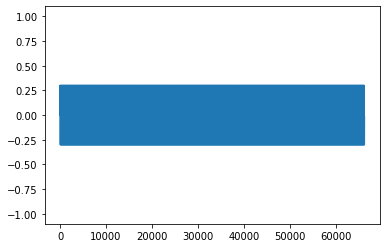

In [12]:
plt.plot(sig)
plt.ylim(-1.1, 1.1);

Hmmm ... maybe we recognize something if we only plot the first 200 values.

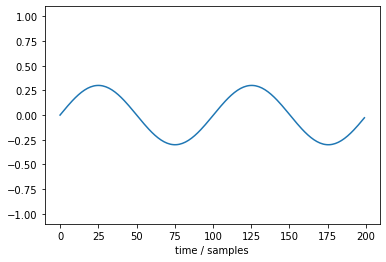

In [13]:
plt.plot(sig[:200])
plt.xlabel("time / samples")
plt.ylim(-1.1, 1.1);

Better.

If we want to show the time in milliseconds instead of samples, we have to specify the time instances:

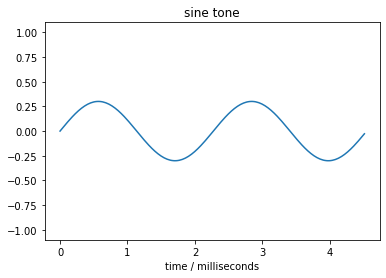

In [14]:
plt.plot(t[:200] * 1000, sig[:200])
plt.title("sine tone")
plt.xlabel("time / milliseconds")
plt.ylim(-1.1, 1.1);

Now that we can *see* our signal, wouldn't it also be nice to hear it?

There are several 3rd-party libraries for Python that allow audio playback, let's try one of them: the [sounddevice](http://python-sounddevice.rtfd.org/) module.

Follow the [installation instructions](http://python-sounddevice.rtfd.org/#Installation), then re-start the IPython kernel and re-evaluate this notebook (with the menu commands "Kernel" $\to$ "Restart" and "Cell" $\to$ "Run All Above") and continue here:

In [15]:
import sounddevice as sd

In [16]:
sd.play(sig, fs)

Did it work? No?

Don't despair, if you can't play the signal directly, you can save it to a sound file and play that in an external sound file player.
I've written a separate [description how to read and write audio files in Python](audio-files/index.ipynb), have a look there.

OK, now we know how to create a *mono* signal, but what about *stereo*?

For now, we were using one-dimensional arrays, but for stereo signals we need two-dimensional arrays.
The 2 channels can be either stored as rows or as columns of such a two-dimensional array.
Both ways are possible, but it's more common to store the channels as columns.

Let's create two sine signals with different frequencies, one on the left channel and one on the right.

There are several possibilities:

1. Create two separate mono signals like above, and combine them with [numpy.column_stack()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html)

1. Duplicate the time array `t` and the array with the two frequencies with [numpy.tile()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html) and use those larger two-dimensional arrays in the calculations (this is not recommended)

1. Use [broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) and do everything at once

1. For sure, there are more ways to do this ...

In this case, let's use *broadcasting*!

This means that we use arrays of different (but compatible) shapes in our calculations and the singular dimensions are internally repeated.
This sounds complicated, let's just see it in an example.

Remember our time array `t`?

In [17]:
t

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       1.49993197e+00, 1.49995465e+00, 1.49997732e+00])

This array is one-dimensional (note that there is only one pair of brackets).

To be completely obvious, we could also check the number of dimensions explicitly:

In [18]:
t.ndim

1

But we can re-shape it, for example into a two-dimensional array with one column.
We can specify the concrete shape, or we can set one component to `-1`, which means this dimension is determined automatically, based on the given data.

In [19]:
t.reshape(-1, 1)

array([[0.00000000e+00],
       [2.26757370e-05],
       [4.53514739e-05],
       ...,
       [1.49993197e+00],
       [1.49995465e+00],
       [1.49997732e+00]])

The result is two-dimensional (note the two levels of brackets!).

Let's now create an array for our two frequencies.

In [20]:
freq = np.array([500, 600])
freq

array([500, 600])

As you can see, this two-element array is one-dimensional.

The interesting part comes when we multiply those two arrays:

In [21]:
freq * t.reshape(-1, 1)

array([[0.00000000e+00, 0.00000000e+00],
       [1.13378685e-02, 1.36054422e-02],
       [2.26757370e-02, 2.72108844e-02],
       ...,
       [7.49965986e+02, 8.99959184e+02],
       [7.49977324e+02, 8.99972789e+02],
       [7.49988662e+02, 8.99986395e+02]])

Wow, the result is a two-dimensional array with two columns!
The left column holds the time array element-wise multiplied with the left frequency, the right column used the right frequency value for multiplication.

Isn't this great?
Now we can use this for creating our *stereo* sine signal:

In [22]:
sig = amp * np.sin(2 * np.pi * freq * t.reshape(-1, 1))
sig

array([[ 0.        ,  0.        ],
       [ 0.02135331,  0.02561443],
       [ 0.0425983 ,  0.05104179],
       ...,
       [-0.0636272 , -0.07609638],
       [-0.0425983 , -0.05104179],
       [-0.02135331, -0.02561443]])

Again, we have an array with two columns, one for each channel.

The plt.plot() function can handle two-dimensional arrays and just plots each column with a new color. How convenient!

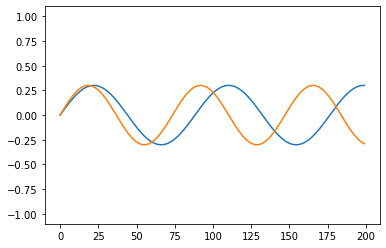

In [23]:
plt.plot(sig[:200])
plt.ylim(-1.1, 1.1);

Of course we can again plot the time in milliseconds.
And let's add a legend in order to distinguish the two signals!

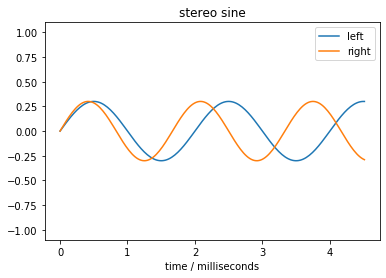

In [24]:
plt.plot(t[:200] * 1000, sig[:200])
plt.title("stereo sine")
plt.xlabel("time / milliseconds")
plt.legend(["left", "right"])
plt.ylim(-1.1, 1.1);

If you want to know more about plotting, have a look at my [pages about plotting](plotting/index.ipynb), especially the [matplotlib intro](plotting/matplotlib.ipynb).

Like before, you can play back the signal, but this time in stereo, hooray!

In [25]:
sd.play(sig, fs)

That's it for this little example, if you want to know more, go back to the [main page](index.ipynb) and dive in!

Have fun!

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>